In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
dataset = pd.read_csv('wine.csv')
dataset.shape

(178, 14)

In [119]:
dataset.head(5)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [120]:
dataset.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [121]:
X = dataset.iloc[: , 0:12].values
Y = dataset.iloc[: , 13].values

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train_lda = X_train.copy()
X_test_lda = X_test.copy()
Y_train_lda = Y_train.copy()
Y_test_lda = Y_test.copy()

In [123]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

X_train_lda = sc_X.fit_transform(X_train_lda)
X_test_lda = sc_X.fit_transform(X_test_lda)

In [124]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [125]:
pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

In [126]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

X_train_lda = lda.fit(X_train_lda, Y_train_lda).transform(X_train_lda)
X_test_lda = lda.fit(X_test_lda, Y_test_lda).transform(X_test_lda)

In [127]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.34640974, 0.18512728])

In [128]:
explained_variance_lda = lda.explained_variance_ratio_
explained_variance_lda

array([0.5615102, 0.4384898])

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
classifier = LogisticRegression(random_state=0)
classifier_lda = LogisticRegression(random_state=0)

In [131]:
classifier.fit(X_train, Y_train)
classifier_lda.fit(X_train_lda, Y_train_lda)

classifier.fit(X_test, Y_test)
classifier_lda.fit(X_test_lda, Y_test_lda)

LogisticRegression(random_state=0)

Rzeczywiście jest różnica w celności przewidzeń, gdy dotrenujemy model do próbek testowych.

In [132]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [133]:
Y_pred_lda = classifier_lda.predict(X_test_lda)
Y_pred_lda

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [134]:
from sklearn.metrics import confusion_matrix as cm
conf_matrix = cm(Y_test, Y_pred)
conf_matrix

array([[13,  1,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [135]:
conf_matrix_lda = cm(Y_test_lda, Y_pred_lda)
conf_matrix_lda

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [136]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9444444444444444

In [137]:
accuracy_lda = accuracy_score(Y_test_lda, Y_pred_lda)
accuracy_lda

1.0

In [138]:
Y_pred = classifier.predict(X_train)
Y_pred

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2,
       1, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 1, 2, 1, 3, 3, 1, 2,
       2, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 2, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       2, 3, 2, 1, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [139]:
Y_pred_lda = classifier_lda.predict(X_train_lda)
Y_pred_lda

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,
       2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 1, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [140]:
conf_matrix = cm(Y_train, Y_pred)
conf_matrix

array([[41,  4,  0],
       [ 5, 50,  0],
       [ 0, 11, 31]])

In [141]:
conf_matrix_lda = cm(Y_train_lda, Y_pred_lda)
conf_matrix_lda

array([[45,  0,  0],
       [ 1, 54,  0],
       [ 0,  0, 42]])

In [142]:
accuracy = accuracy_score(Y_train, Y_pred)
accuracy

0.8591549295774648

In [143]:
accuracy_lda = accuracy_score(Y_train_lda, Y_pred_lda)
accuracy_lda

0.9929577464788732

<ipython-input-144-79f7e73d5ab2>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


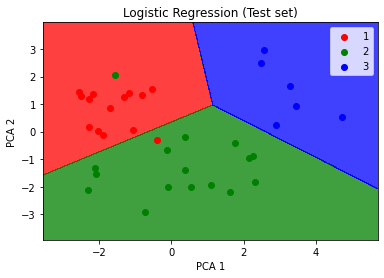

In [144]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Test set)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

<ipython-input-145-fb4cd6e78d6e>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


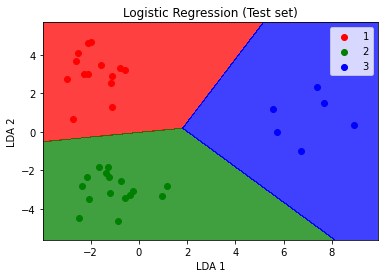

In [145]:
X_set, Y_set = X_test_lda, Y_test_lda
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Test set)")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.legend()
plt.show()

<ipython-input-146-cf8784b9bf05>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


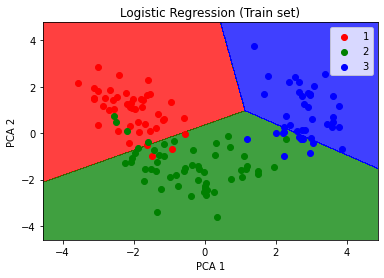

In [146]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Train set)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

<ipython-input-147-a14b3e26d087>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


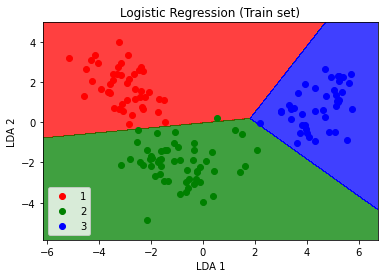

In [147]:
X_set, Y_set = X_train_lda, Y_train_lda
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Train set)")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.legend()
plt.show()

For this .csv file better model is LDA (for both: test and train), but it's real danger, that LDA model is overfitted to the train and test data.

In [148]:
%%shell
jupyter nbconvert --to html ///content/PCA_LDA_wine.ipynb
jupyter nbconvert --to html ///content/PCA_LDA_ToxinbaseClass.ipynb

[NbConvertApp] WARNING | pattern '///content/PCA_LDA_wine.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
-

CalledProcessError: ignored